# Import Libraries

In [550]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as mtplt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import(accuracy_score, precision_score, recall_score, confusion_matrix, classification_report)

# Read DataSet

In [551]:
dataset= pd.read_csv("/content/drive/MyDrive/CSE422 DataSets/air_pollution_dataset.csv")

# Correlation of the features

<Axes: >

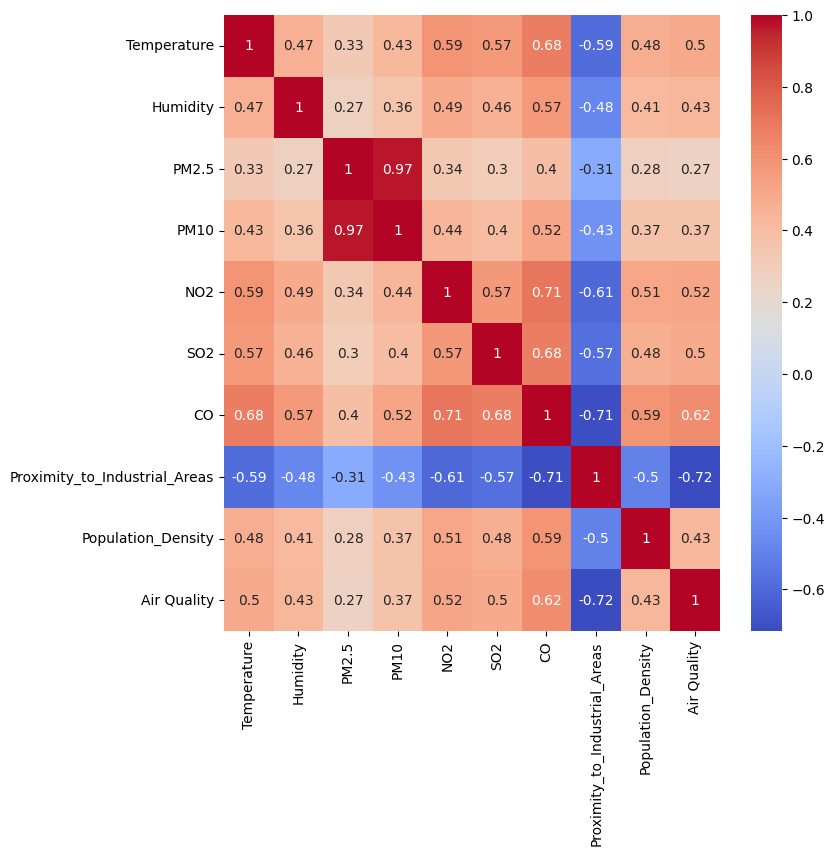

In [552]:
#Converted Categorial value to numerical:
dataset["Air Quality"]= LabelEncoder().fit_transform(dataset["Air Quality"])

corr= dataset.corr()
mtplt.figure(figsize=(8,8))
sn.heatmap(corr, annot=True, cmap='coolwarm')

# DataSet Bar-Chart

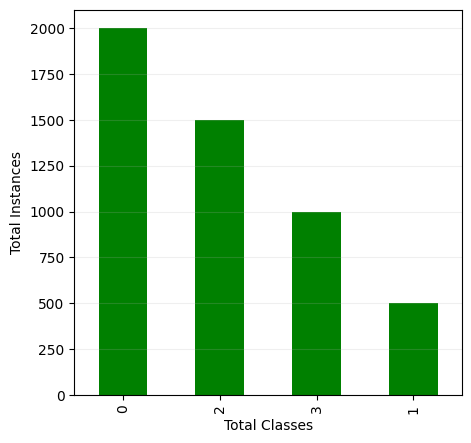

In [553]:
counter= dataset["Air Quality"].value_counts()
mtplt.figure(figsize=(5,5))
counter.plot(kind="bar", color="green")
mtplt.xlabel("Total Classes")
mtplt.ylabel("Total Instances")
mtplt.grid(axis='y', linestyle='-', alpha=.2)

# Data Preprocessing

In [554]:
#PM10 and PM2.5 Highly Correlated
dataset= dataset.drop("PM10", axis=1)

#Handled Missing Values:
dataset = dataset.dropna(axis=0)

#Feature normalization:
features=[]
for i in dataset.columns:
  if i!="Air Quality":
    features.append(i)
dataset[features]= MinMaxScaler().fit_transform(dataset[features])

dataset.head()

,Temperature,Humidity,PM2.5,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
1,0.329646,0.429967,0.007797,0.450867,0.311155,0.322476,0.150215,0.550065,2
2,0.214602,0.420195,0.090508,0.327553,0.367906,0.319218,0.115880,0.560468,2
3,0.303097,0.033659,0.020678,0.117534,0.225049,0.162866,0.369099,0.472042,0
4,0.289823,0.376764,0.023390,0.279383,0.230920,0.117264,0.437768,0.149545,0
5,0.575221,0.657980,0.049492,0.684008,0.471624,0.381107,0.025751,0.631990,1


# Data Splitting

In [555]:
x= dataset.drop("Air Quality", axis=1)
y= dataset["Air Quality"]
#print(x)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .3, random_state = 10, stratify=y)

print(xTrain.shape)
xTest.shape

(3156, 8)


(1353, 8)

# Model Train


### Decision Tree

In [556]:
from sklearn.tree import DecisionTreeClassifier

DT= DecisionTreeClassifier(class_weight="balanced", random_state=8)
DT.fit(xTrain, yTrain)
dt_pred= DT.predict(xTest)


dt_accu= accuracy_score(yTest, dt_pred)
dt_prec= precision_score(yTest, dt_pred, average='weighted')
dt_recall= recall_score(yTest, dt_pred, average='weighted')

### Logistic Regression

In [557]:
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression(class_weight= "balanced", random_state=16)
LR.fit(xTrain, yTrain)
lr_pred= LR.predict(xTest)


lr_accu= accuracy_score(yTest, lr_pred)
lr_prec= precision_score(yTest, lr_pred, average='weighted')
lr_recall= recall_score(yTest, lr_pred, average='weighted')



### Naive Bayes

In [558]:
from sklearn.naive_bayes import GaussianNB
NB= GaussianNB(priors=[0.1, 0.4, 0.2, 0.3])
NB.fit(xTrain, yTrain)
nb_pred= NB.predict(xTest)


nb_accu= accuracy_score(yTest, nb_pred)
nb_prec= precision_score(yTest, nb_pred, average='weighted')
nb_recall= recall_score(yTest, nb_pred, average='weighted')

# Model Comparison Analysis

In [559]:
accu= [round(dt_accu,2), round(lr_accu,2), round(nb_accu,2)]
recall= [round(dt_recall ,2), round(lr_recall, 2), round(nb_recall, 2)]
precision= [round(dt_prec, 2), round(lr_prec, 2), round(nb_prec, 2)]

### Bar Chart for accuracy

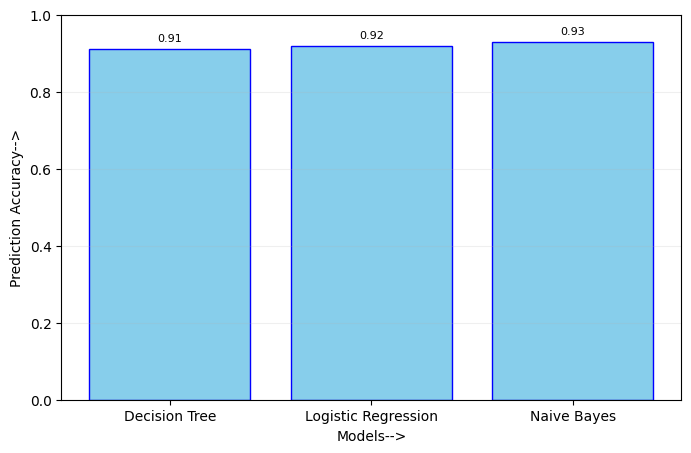

In [560]:
mtplt.figure(figsize=(8,5))
mtplt.bar(["Decision Tree", "Logistic Regression", "Naive Bayes"], accu, color="skyblue", edgecolor="blue")
mtplt.xlabel("Models-->")
mtplt.ylabel("Prediction Accuracy-->")
mtplt.ylim(0,1)
mtplt.grid(axis='y', linestyle='-', alpha=.2)
for i, acc in enumerate(accu):
    mtplt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=8)

### Precision and Recall Comparison

In [561]:
metrics = {
    "Model": [],
    "Precision": [],
    "Recall": []
}
metrics["Model"].append("Decision Tree")
metrics["Precision"].append(dt_prec)
metrics["Recall"].append(dt_recall)

metrics["Model"].append("Logistic Regression")
metrics["Precision"].append(lr_prec)
metrics["Recall"].append(lr_recall)

metrics["Model"].append("Naive Bayes")
metrics["Precision"].append(nb_prec)
metrics["Recall"].append(nb_recall)

metrics_df = pd.DataFrame(metrics)
print(metrics_df)



                 Model  Precision    Recall
0        Decision Tree   0.912254  0.913525
1  Logistic Regression   0.922501  0.923134
2          Naive Bayes   0.928487  0.926829


### Confusion Matrices

In [562]:
print("Decision Tree Confusion Matrix:\n")
print(confusion_matrix(yTest, dt_pred))

print("\nLogistic Regression Confusion Matrix:\n")
print(confusion_matrix(yTest, lr_pred))

print("\nNaive Bayes Confusion Matrix:\n")
print(confusion_matrix(yTest, nb_pred))

Decision Tree Confusion Matrix:

[[535   0   2   1]
 [  0 102   0  38]
 [  3   0 380  16]
 [  0  26  31 219]]

Logistic Regression Confusion Matrix:

[[538   0   0   0]
 [  0 115   0  25]
 [ 12   0 368  19]
 [  0  25  23 228]]

Naive Bayes Confusion Matrix:

[[537   0   1   0]
 [  0 119   0  21]
 [  1   0 370  28]
 [  0  33  15 228]]
